In [140]:
import cvxpy as cp
import numpy as np

from itertools import product


x1 = cp.Variable()
x2 = cp.Variable()
u1 = cp.Parameter()
u2 = cp.Parameter()

P = np.array([
    [1, -.5],  # x1**2, 1/2 x1*x2
    [-.5, 2],  # 1/2 x1*x2, x2**2
])
f0 = cp.Minimize(cp.quad_form(cp.hstack([x1, x2]), P) - x1)
constraints = [
    x1 + 2*x2 <= u1,
    x1 - 4*x2 <= u2,
    x1 + x2 >= -5
    # 5*x1 + 76*x2 <= 1
]
xstar = []
prob = cp.Problem(f0, constraints)

for d1, d2 in product([0, -.1, .1], [0, -.1, .1]):
    u1.value = -2 + d1
    u2.value = -3 + d2

    prob.solve()
    if d1 == 0 and d2 == 0:
        pstar = prob.value
    xstar.append([x1.value, x2.value])
    pexact = f0.value
    ppred = pstar - constraints[0].dual_value * d1 - constraints[1].dual_value * d2
    pdiff = pexact - ppred
    # print(f"lamb1={constraints[0].dual_value:.2f}, lamb2={constraints[1].dual_value:.2f}, lamb3={constraints[2].dual_value:.2f}")
    print(f"d1={d1:.1f}\td2={d2:.1f}\tp_pred={ppred:.2f}\tp_exact={pexact:.2f}\tdiff={pexact - ppred:.4f}")


d1=0.0	d2=0.0	p_pred=8.22	p_exact=8.22	diff=0.0000
d1=0.0	d2=-0.1	p_pred=8.47	p_exact=8.47	diff=-0.0022
d1=0.0	d2=0.1	p_pred=7.98	p_exact=7.98	diff=-0.0022
d1=-0.1	d2=0.0	p_pred=8.57	p_exact=8.56	diff=-0.0039
d1=-0.1	d2=-0.1	p_pred=8.83	p_exact=8.82	diff=-0.0100
d1=-0.1	d2=0.1	p_pred=8.32	p_exact=8.32	diff=-0.0022
d1=0.1	d2=0.0	p_pred=7.89	p_exact=7.89	diff=-0.0039
d1=0.1	d2=-0.1	p_pred=8.13	p_exact=8.13	diff=-0.0022
d1=0.1	d2=0.1	p_pred=7.66	p_exact=7.65	diff=-0.0100


In [95]:
import matplotlib.pyplot as plt

(-1.0, 4.0)

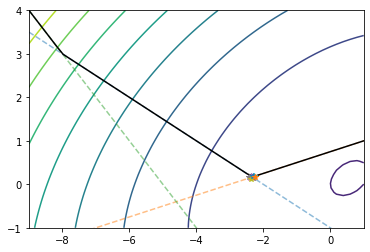

In [145]:
# P = np.array([
#     [1, -.5],  # x1**2, 1/2 x1*x2
#     [-.5, 2],  # 1/2 x1*x2, x2**2
# ])
# f0 = cp.Minimize(cp.quad_form(cp.hstack([x1, x2]), P) - x1)
# constraints = [
#     x1 + 2*x2 <= u1,
#     x1 - 4*x2 <= u2,
#     x1 + x2 >= -5
# ]

# x1: [-9, -1]
# x2: [-1, 4]

u1.value = -2
u2.value = -3

x = np.array([
    np.linspace(-9, 1),
    np.linspace(-1, 4)
])

# x2 >= -.5 * (x1 - u1)
# x2 >= .25 * (x1 - u2)
# x2 >= -x1 - 5
f1 = -.5 * (x[0] - u1.value)
f2 = .25 * (x[0] - u2.value)
f3 = -x[0] - 5
fi = [f1, f2, f3]

for f in fi:
    plt.plot(x[0], f, alpha=0.5, ls='--')  # feasible x2 above this line

plt.plot(x[0], np.max(fi, axis=0), 'k')  # inequality boundary

x1grid, x2grid = np.meshgrid(x[0], x[1])
xgrid = np.array([
    x1grid.reshape(-1),
    x2grid.reshape(-1)
])
f0 = ((xgrid.T.dot(P)*xgrid.T).sum(axis=1) - xgrid[0]).reshape(50, 50)
plt.contour(x1grid, x2grid, f0)
for xstarv in xstar:
    plt.plot(xstarv[0], xstarv[1], marker="*")

plt.ylim(-1, 4)

In [3]:
print(f"""p*={pstar:.2f}
x1={x1.value:.2f}, x2={x2.value:.2f}
f1={x1.value + 2*x2.value - u1.value}, f2={x1.value - 4*x2.value - u2.value:.2f}, f3={-5 - x1.value - x2.value:.2f}
lamb1={constraints[0].dual_value:.2f}, lamb2={constraints[1].dual_value:.2f}, lamb3={constraints[2].dual_value:.2f}
""")

p*=8.22
x1=-2.23, x2=0.17
f1=0.0, f2=-0.00, f3=-2.93
lamb1=3.27, lamb2=2.36, lamb3=0.00



In [23]:
r = 1.01
u = 1.1
d = 0.95

denom = r * (u - d)

S = 1  # MSFT
K = .06

C = (max((0, S*u-K)) * (r-d) + max((0, S*d-K))*(u-r))/(r * (u-d))
C

0.9405940594059405

In [89]:
r = 1.05
S0 = 1
F = 0.9
C = 1.15

n = 7  # assets
m = 200  # asset projections
V = np.zeros((m, n))

V[:,0] = r  # default asset prices
V[:, 1] = np.linspace(0.5, 2, m)  # possible asset values
V[:, 2] = np.max((V[:, 1] - 1.1, np.zeros(m)), axis=0)  # first call option
V [:, 3] = np.max((V[:, 1] - 1.2, np.zeros(m)), axis=0)  # second call option
V[:, 4] = np.max((0.8 - V[:, 1], np.zeros(m)), axis=0)  # first put option
V[:, 5] = np.max((0.7 - V[:, 1], np.zeros(m)), axis=0)  # second put option
V[:, 6] = np.min((np.max((V[:, 1]-1, np.ones(m)*(F-1)), axis=0), np.ones(m)*(C-1)), axis=0)

p = np.array((1, 1, 0.06, 0.03, 0.02, 0.01))

In [90]:
np.linalg.matrix_rank(V)

7

In [92]:
p_collar = cp.Variable()
y = cp.Variable(m, nonneg=True)

constraints = [V.T @ y == cp.hstack([p, p_collar])]

f0 = cp.Maximize(p_collar)
prob = cp.Problem(f0, constraints)
prob.solve()

0.06495039682537881

In [68]:
np.max((V[:, 1]-1, np.ones(m)*(F-1)), axis=0)

array([-0.1       , -0.1       , -0.1       , -0.1       , -0.1       ,
       -0.1       , -0.1       , -0.1       , -0.1       , -0.1       ,
       -0.1       , -0.1       , -0.1       , -0.1       , -0.1       ,
       -0.1       , -0.1       , -0.1       , -0.1       , -0.1       ,
       -0.1       , -0.1       , -0.1       , -0.1       , -0.1       ,
       -0.1       , -0.1       , -0.1       , -0.1       , -0.1       ,
       -0.1       , -0.1       , -0.1       , -0.1       , -0.1       ,
       -0.1       , -0.1       , -0.1       , -0.1       , -0.1       ,
       -0.1       , -0.1       , -0.1       , -0.1       , -0.1       ,
       -0.1       , -0.1       , -0.1       , -0.1       , -0.1       ,
       -0.1       , -0.1       , -0.1       , -0.1       , -0.09296482,
       -0.08542714, -0.07788945, -0.07035176, -0.06281407, -0.05527638,
       -0.04773869, -0.04020101, -0.03266332, -0.02512563, -0.01758794,
       -0.01005025, -0.00251256,  0.00502513,  0.01256281,  0.02